<a href="https://colab.research.google.com/github/Canchili/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [11]:
df = pd.read_csv("/content/Customers.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [20]:
# преобразовать категориальные признаки в category
categorial_features = ['Gender', 'Profession']  # ваши названия категориальных колонок
for col in categorial_features:
    df[col] = df[col].astype('category')

In [21]:
# выбрать целевую переменную и разделить на X, y
# целевая переменная - числовой непрерывный признак

target = 'Spending Score (1-100)'
X = df.drop(target, axis=1)

## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [22]:
categorial_features = ['Gender', 'Profession'] # перечислить названия колонок с категориальными фичами
numeric_features = ['Age', 'Annual Income ($)', 'Work Experience', 'Family Size']
 # перечислить названия колонок с категориальными фичами
best_features = categorial_features + numeric_features

In [23]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [25]:
# Для категориального признака 'Profession' заполняем пропуски наиболее частым значением (модой),
#Она сводит к минимуму искажение распределения данных и не учитывает влияние числовых результатов.
#Удавать строки с пропусками нецелесообразно, т.к. теряем данные.
#Заполнение уровня или медианой для категорий не подходит, так как это численные методы.

imputer_cat = SimpleImputer(strategy='most_frequent')

imputed = imputer_cat.fit_transform(df[['Profession']])

df['Profession'] = pd.Series(imputed.flatten(), index=df.index)

In [26]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Модель1

MAE: 23.632
MAPE: inf%
R²: 0.007
MSE: 774.690
RMSE: 27.833


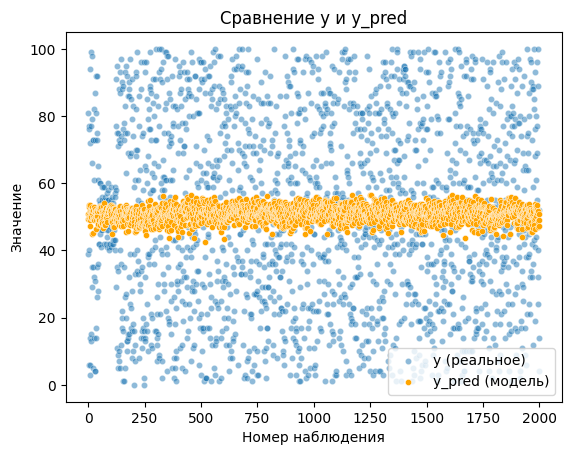

In [35]:
numeric_features = [f for f in best_features if f not in categorial_features]

# OneHot кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = encoder.fit_transform(df[categorial_features])
cat_feature_names = encoder.get_feature_names_out(categorial_features)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[numeric_features])

# Объединяем обработанные признаки в DataFrame с именами столбцов
X_scaled = pd.DataFrame(np.hstack([X_num_scaled, X_cat_encoded]),
                        columns=list(numeric_features) + list(cat_feature_names),
                        index=df.index)

# Целевая переменная
y = df[target]

# Создание и обучение модели на всей выборке
model1 = LinearRegression()
model1.fit(X_scaled, y)

# Предсказания на той же выборке
y_pred = model1.predict(X_scaled)

# Вычисление метрик
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.2f}%')
print(f'R²: {r2:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange", s=20)

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

MAE = 23,632: в средней модели ошибка происходит примерно на 23,6 значения. Это довольно большая средняя ошибка, говорящая о том, что модель не очень точна.

MAPE = inf%: бесконечное значение появляется, если в переменной есть нули (деление на ноль) или очень маленькие значения. Эту проблему стоит проверить и при необходимости применить трансформацию данных.

R² = 0,007: почти ноль, что означает, что модель сердца примерно 0,7% вариаций переменной переменной — очень низкий показатель, модель практически не лучше случайного угадывания.

MSE = 774,690 и RMSE = 27,833: высокие значения ошибок, указывающие, что предсказания далеко от начальных значений.

## Ниже представлены подсказки, то что нужно использовать и как должно называться

### Преобразование категориальных

In [ ]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["YOU_VARIABLE_NAME"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [ ]:
X_encoded = ...

In [ ]:
X = X.drop('YOU_VARIABLE_NAME', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

### Преобразование числовых

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # попробовать избавиться от категориальных. То ест не засовывать такие признаки в стандартизацию


### Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# model.fit(X, y) - обучение
# model.predict(X) - предсказание y
# model.coef_ - коэфициенты фич (каждый коэф относится по индексу к своей фиче)

# для того, чтобы не запутаться используйте следующий нейминг
model1 = LinearRegression() # модель задачи 1
model2 = LinearRegression() # модель задачи 2
... # и так далее

### Разделение на обучающую, тестовую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест